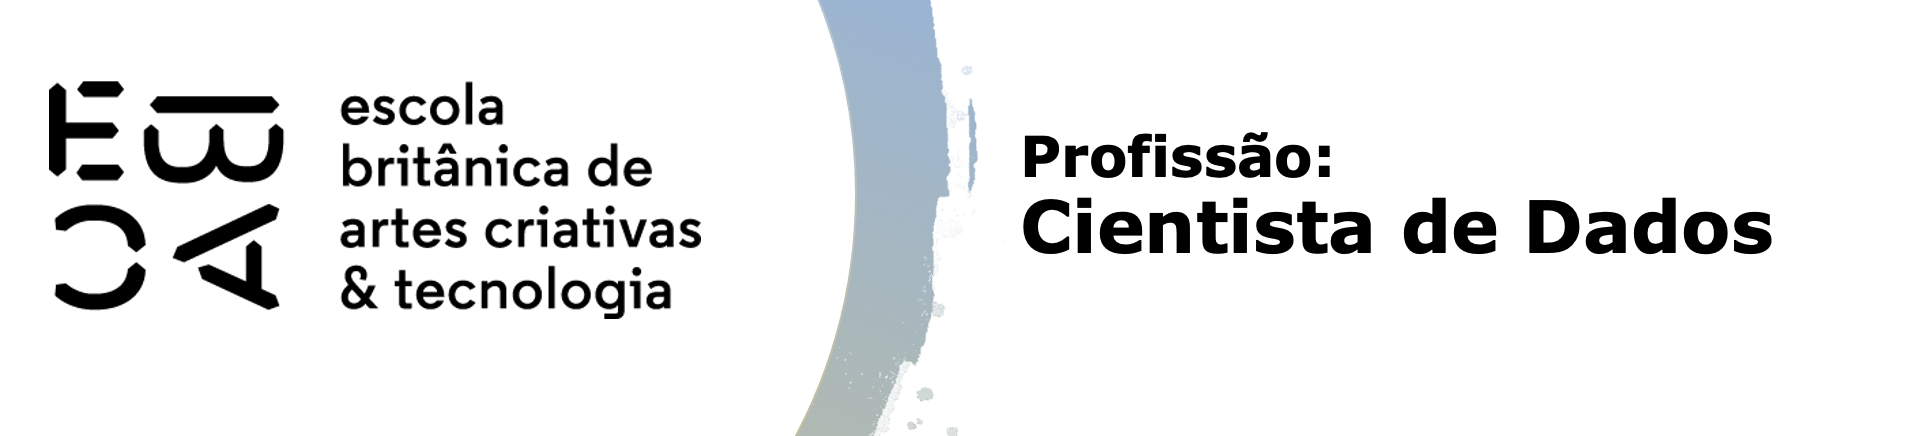

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

In [138]:
x_train_df = pd.read_csv("uci_har_dataset/train/X_train.txt", header=None, delim_whitespace=True)
x_test_df = pd.read_csv("uci_har_dataset/test/X_test.txt", header=None, delim_whitespace=True)
y_train_df = pd.read_csv("uci_har_dataset/train/y_train.txt", header=None, delim_whitespace=True)
y_test_df = pd.read_csv("uci_har_dataset/test/y_test.txt", header=None, delim_whitespace=True)
X_train = pd.read_csv("uci_har_dataset/x_train.csv", index_col=["order", "subject_train"], sep=",")
X_test = pd.read_csv("uci_har_dataset/x_test.csv", index_col=["order", "subject_test"], sep=",")

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [139]:
# %%time
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_df, test_size=.25, random_state=2360873)
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(X_train, y_train)
variaveis_com_maior_importancia = []

feature_importances = clf.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrando as 3 variáveis mais importantes
top_3_features = feature_importance_df.head(3)
top_3_features["Feature"].values.tolist()

['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [140]:
# %%time
columns = ['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']
X_train = pd.DataFrame(X_train, columns=columns)

clf = DecisionTreeClassifier(random_state=2360873)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

kf = KFold(n_splits=10, shuffle=True, random_state=2360873)

clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=kf, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 23 candidates, totalling 230 fits
[CV 1/10; 1/23] START ccp_alpha=0.0.............................................
[CV 1/10; 1/23] END ..............ccp_alpha=0.0;, score=0.870 total time=   0.0s
[CV 2/10; 1/23] START ccp_alpha=0.0.............................................
[CV 2/10; 1/23] END ..............ccp_alpha=0.0;, score=0.846 total time=   0.0s
[CV 3/10; 1/23] START ccp_alpha=0.0.............................................
[CV 3/10; 1/23] END ..............ccp_alpha=0.0;, score=0.864 total time=   0.0s
[CV 4/10; 1/23] START ccp_alpha=0.0.............................................
[CV 4/10; 1/23] END ..............ccp_alpha=0.0;, score=0.871 total time=   0.0s
[CV 5/10; 1/23] START ccp_alpha=0.0.............................................
[CV 5/10; 1/23] END ..............ccp_alpha=0.0;, score=0.875 total time=   0.0s
[CV 6/10; 1/23] START ccp_alpha=0.0.............................................
[CV 6/10; 1/23] END ..............ccp_alpha=0.

GridSearchCV(cv=KFold(n_splits=10, random_state=2360873, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.00016121, 0.00016927, 0.00017547, 0.00017947,
       0.0001844 , 0.0002348 , 0.0002641 , 0.00028211, 0.00030926,
       0.00032644, 0.00033711, 0.00037315, 0.00041214, 0.00046707,
       0.0005212 , 0.00060159, 0.00074301, 0.00087587, 0.00109959,
       0.00168403, 0.00248857, 0.00645726])},
             verbose=100)

In [141]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016315,0.000266,0.003212,0.000119,0.0,{'ccp_alpha': 0.0},0.869565,0.846014,0.864130,0.871377,0.874773,0.867514,0.863884,0.878403,0.883848,0.847550,0.866706,0.011559,18
1,0.016578,0.000399,0.003203,0.000131,0.000161,{'ccp_alpha': 0.00016120581953008503},0.869565,0.846014,0.862319,0.871377,0.874773,0.869328,0.863884,0.876588,0.885662,0.847550,0.866706,0.011753,17
2,0.016589,0.000439,0.003163,0.000139,0.000169,{'ccp_alpha': 0.00016926611050658934},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.863884,0.876588,0.885662,0.849365,0.866525,0.011375,19
3,0.016437,0.000200,0.003131,0.000128,0.000175,{'ccp_alpha': 0.0001754745948209604},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.865699,0.876588,0.885662,0.847550,0.866525,0.011633,19
4,0.016482,0.000295,0.003122,0.000095,0.000179,{'ccp_alpha': 0.00017946741627372726},0.867754,0.846014,0.862319,0.869565,0.874773,0.869328,0.865699,0.876588,0.887477,0.847550,0.866707,0.011940,16
5,0.016404,0.000358,0.003137,0.000144,0.000184,{'ccp_alpha': 0.00018440455616414137},0.871377,0.846014,0.862319,0.869565,0.874773,0.872958,0.865699,0.876588,0.887477,0.849365,0.867614,0.011850,15
6,0.016487,0.000262,0.003104,0.000076,0.000235,{'ccp_alpha': 0.00023479978061990633},0.873188,0.851449,0.856884,0.873188,0.878403,0.876588,0.885662,0.887477,0.891107,0.851180,0.872513,0.013921,12
7,0.016609,0.000346,0.003102,0.000123,0.000264,{'ccp_alpha': 0.000264103151145033},0.873188,0.851449,0.855072,0.875000,0.882033,0.872958,0.885662,0.889292,0.894737,0.851180,0.873057,0.014986,11
8,0.016810,0.000344,0.003083,0.000075,0.000282,{'ccp_alpha': 0.0002821101841776488},0.869565,0.855072,0.860507,0.876812,0.885662,0.874773,0.891107,0.887477,0.894737,0.849365,0.874508,0.014877,8
9,0.016799,0.000348,0.003166,0.000222,0.000309,{'ccp_alpha': 0.00030926063799324206},0.873188,0.851449,0.864130,0.876812,0.883848,0.872958,0.887477,0.885662,0.891107,0.849365,0.873600,0.013886,10


In [142]:
grid.best_score_

0.8768625555643231

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [143]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

X_test = pd.DataFrame(X_test, columns=columns)
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)
acuracia_teste = clf.score(X_test, y_test_df)

print(f'Acurácia: {acuracia_teste*100:.2f}')

Acurácia: 68.71


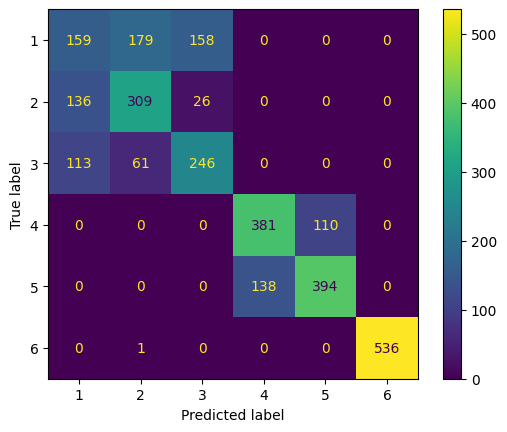

In [144]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test_df)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [145]:
X_train = pd.read_csv("uci_har_dataset/x_train.csv", index_col=["order", "subject_train"], sep=",")
X_test = pd.read_csv("uci_har_dataset/x_test.csv", index_col=["order", "subject_test"], sep=",")
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_df, test_size=.25, random_state=2360873)

clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test_df, y_pred)

classe_erros = (abs(confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)))
classe_erros

array([ 55, 118,  79, 106,  95,   0])

In [146]:
classe_erros = classe_erros.tolist()
classe_erros.sort()
classe_erros

[0, 55, 79, 95, 106, 118]

In [147]:
classe_maior_erro = classe_erros.index(classe_erros[-1])
classe_segundo_maior_erro = classe_erros.index(classe_erros[-2])

In [148]:
y_bin1_treino = np.where(y_train == classe_maior_erro, 1, 0)
y_bin1_teste = np.where(y_test_df == classe_maior_erro, 1, 0)

y_bin3_treino = np.where(y_train == classe_segundo_maior_erro, 1, 0)
y_bin3_teste = np.where(y_test_df == classe_segundo_maior_erro, 1, 0)

In [149]:
clf2 = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train, y_bin1_treino)

clf3 = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train, y_bin3_treino)


In [150]:
most_important_features = clf2.feature_importances_

most_important_features = pd.Series(clf2.feature_importances_, index=X_train.columns)

most_important_cols_bin1 = list(most_important_features.nlargest(3).index)

In [151]:
most_important_features = clf3.feature_importances_

most_important_features = pd.Series(clf3.feature_importances_, index=X_train.columns)

most_important_cols_bin3 = list(most_important_features.nlargest(3).index)

In [152]:
variaveis_anteriores = ['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']

In [153]:
most_important_cols_bin1

['angle(Y,gravityMean)',
 'fBodyAcc-skewness()-X',
 'fBodyAccJerk-bandsEnergy()-9,16.2']

In [154]:
most_important_cols_bin3

['tGravityAcc-min()-X', 'angle(Y,gravityMean)', 'tBodyGyro-mad()-X']

In [156]:
variaveis_relevantes = variaveis_anteriores + most_important_cols_bin1 + most_important_cols_bin3
variaveis_relevantes_filtradas = []
for item in variaveis_relevantes:
    if item not in variaveis_relevantes_filtradas:
        variaveis_relevantes_filtradas.append(item)
variaveis_relevantes_filtradas

['tGravityAcc-min()-X',
 'fBodyAcc-mean()-X',
 'angle(Y,gravityMean)',
 'fBodyAcc-skewness()-X',
 'fBodyAccJerk-bandsEnergy()-9,16.2',
 'tBodyGyro-mad()-X']

In [160]:
clf_binary = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
path = clf_binary.cost_complexity_pruning_path(X_train[variaveis_relevantes_filtradas], y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
grid_parametros = {"ccp_alpha": ccp_alphas[::10]}

In [161]:
grid = GridSearchCV(estimator=clf_binary, param_grid=grid_parametros, cv=10, verbose=10)
grid.fit(X_train[variaveis_relevantes_filtradas], y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10; 1/30] START ccp_alpha=0.0.............................................
[CV 1/10; 1/30] END ..............ccp_alpha=0.0;, score=0.899 total time=   0.0s
[CV 2/10; 1/30] START ccp_alpha=0.0.............................................
[CV 2/10; 1/30] END ..............ccp_alpha=0.0;, score=0.893 total time=   0.0s
[CV 3/10; 1/30] START ccp_alpha=0.0.............................................
[CV 3/10; 1/30] END ..............ccp_alpha=0.0;, score=0.889 total time=   0.0s
[CV 4/10; 1/30] START ccp_alpha=0.0.............................................
[CV 4/10; 1/30] END ..............ccp_alpha=0.0;, score=0.875 total time=   0.0s
[CV 5/10; 1/30] START ccp_alpha=0.0.............................................
[CV 5/10; 1/30] END ..............ccp_alpha=0.0;, score=0.875 total time=   0.0s
[CV 6/10; 1/30] START ccp_alpha=0.0.............................................
[CV 6/10; 1/30] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.51130456e-04, 1.58686979e-04, 1.61544487e-04,
       1.68402508e-04, 1.71811466e-04, 1.76022531e-04, 1.79578542e-04,
       1.83351558e-04, 2.17627856e-04, 2.41808729e-04, 2.41808729e-04,
       2.68676366e-04, 2.82110184e-04, 2.90170475e-04, 3.02260912e-04,
       3.22283331e-04, 3.34475561e-04, 3.59834419e-04, 4.09059767e-04,
       4.39419582e-04, 5.00477214e-04, 5.64220368e-04, 6.31396303e-04,
       8.16104461e-04, 9.17387077e-04, 1.41458107e-03, 2.10246661e-03,
       3.02148680e-03, 1.66955150e-01])},
             verbose=10)

In [162]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025147,0.001347,0.003256,0.000169,0.0,{'ccp_alpha': 0.0},0.898551,0.893116,0.889493,0.875,0.874773,0.874773,0.880218,0.896552,0.896552,0.874773,0.88538,0.009858,7
1,0.024887,0.000620,0.003215,0.000156,0.000151,{'ccp_alpha': 0.00015113045580945474},0.898551,0.893116,0.889493,0.875,0.874773,0.874773,0.880218,0.896552,0.896552,0.874773,0.88538,0.009858,7
2,0.024825,0.000414,0.003180,0.000062,0.000159,{'ccp_alpha': 0.00015868697859992747},0.898551,0.893116,0.889493,0.875,0.874773,0.874773,0.880218,0.896552,0.896552,0.874773,0.88538,0.009858,7
3,0.024855,0.000673,0.003213,0.000100,0.000162,{'ccp_alpha': 0.00016154448721817348},0.898551,0.893116,0.889493,0.875,0.874773,0.874773,0.880218,0.896552,0.896552,0.874773,0.88538,0.009858,7
4,0.025188,0.000878,0.003183,0.000069,0.000168,{'ccp_alpha': 0.00016840250790196387},0.898551,0.893116,0.889493,0.875,0.874773,0.874773,0.880218,0.896552,0.896552,0.874773,0.88538,0.009858,7


In [163]:
grid.best_params_

{'ccp_alpha': 0.000439419581582364}

In [164]:
grid.best_score_

0.8857426549882954

In [165]:
grid.best_index_

20

In [170]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]

clf_var_relevantes = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train[variaveis_relevantes_filtradas], y_train)
clf_var_relevantes

DecisionTreeClassifier(ccp_alpha=0.000439419581582364, random_state=2360873)

In [173]:
acuracia_teste = clf_var_relevantes.score(X_test[variaveis_relevantes_filtradas], y_test_df)
print(f'Acurácia: {acuracia_teste*100:.2f}')

Acurácia: 77.40


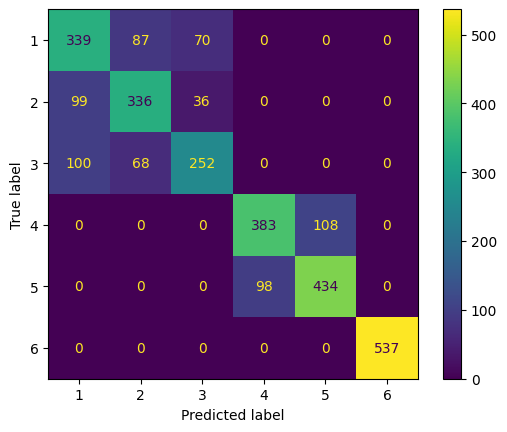

In [174]:
ConfusionMatrixDisplay.from_estimator(estimator=clf_var_relevantes, X=X_test[variaveis_relevantes_filtradas], y=y_test_df)